<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/EDO_Aplicadas-IMCA/blob/main/Clase2_Prof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Runge-Kutta 2

$$
\begin{array}{rcl}
k_1 & = & f(t_i,u_i) \\
k_2 & = & f(t_i + \alpha h, u_i + \beta h k_1 \\
u_{i+1} & = & u_i + h(a k_1 + b k_2)
\end{array}
$$
donde:
$$
a + b = 1, \quad \alpha b = \frac{1}{2}, \quad \beta b = \frac{1}{2}
$$


Considere el PVI:
$$
\begin{array}{rcl}
y^{\prime} & = & cos(2t)+sen(3t), \quad 0 \leq t \leq 1 \\
y(0) & = & 1
\end{array}
$$
cuya solución exacta es:
$$
y(t) = \frac{1}{2}sen(2t) - \frac{1}{3} cos(3t) + \frac{4}{3}.
$$

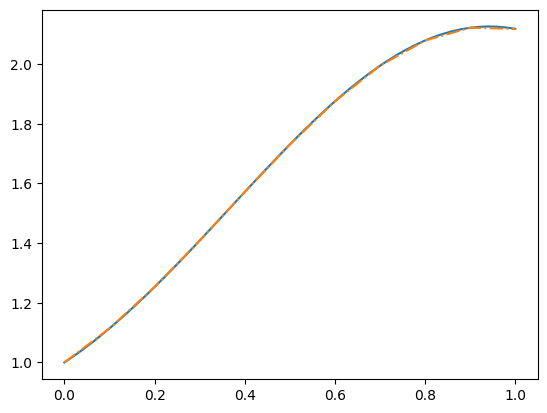

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Solución exacta
def y(t):
    yt = np.sin(2*t)/2 - np.cos(3*t)/3 + 4/3
    return yt

# Lado derecho
def f(t,y):
    fty = np.cos(2*t) + np.sin(3*t) + 0*y
    return fty

def MRK2(t0,tN,y0,b,N):
    # Método de Runge-Kutta 2: Método de Euler Modificado
    a = 1 - b
    alpha = 1/(2*b)
    beta = 1/(2*b)
    u0 = y0

    h = (tN - t0)/N

    RK2 = np.zeros((N+1,2))
    RK2[0,0] = t0
    RK2[0,1] = u0
    for i in range(1,N+1):
        k1 = f(t0,u0)
        k2 = f(t0 + alpha*h,u0 + beta*h*k1)
        u1 = u0 + h*(a*k1 + b*k2)

        t0 = t0 + h
        RK2[i,0] = t0
        RK2[i,1] = u1

        u0 = u1

    return RK2

def MRK3(t0,tN,y0,N):
    # Método de Runge-Kutta 3: Método de Heun
    u0 = y0

    h = (tN - t0)/N

    RK3 = np.zeros((N+1,2))
    RK3[0,0] = t0
    RK3[0,1] = u0
    for i in range(1,N+1):
        k1 = f(t0,u0)
        k2 = f(t0 + h/3,u0 + h*k1/3)
        k3 = f(t0 + 2*h/3,u0 + 2*h*k2/3)
        u1 = u0 + h*(k1 + 3*k3)/4

        t0 = t0 + h
        RK3[i,0] = t0
        RK3[i,1] = u1

        u0 = u1

    return RK3

def MRK4(t0,tN,y0,N):
    # Método de Runge-Kutta 4
    u0 = y0

    h = (tN - t0)/N

    RK4 = np.zeros((N+1,2))
    RK4[0,0] = t0
    RK4[0,1] = u0
    for i in range(1,N+1):
        k1 = f(t0,u0)
        k2 = f(t0 + h/2,u0 + h*k1/2)
        k3 = f(t0 + h/2,u0 + h*k2/2)
        k4 = f(t0  + h, u0 + h*k3)
        u1 = u0 + h*(k1 + 2*k2 + 2*k3 + k4)/6

        t0 = t0 + h
        RK4[i,0] = t0
        RK4[i,1] = u1

        u0 = u1

    return RK4

# Condición inicial
t0 = 0
tN = 1
y0 = 1
N = 10

MEuMod = MRK2(t0,tN,y0,1/2,N)

MPuntoMedio = MRK2(t0,tN,y0,1,N)

MHeun = MRK3(t0,tN,y0,N)

RK4 = MRK4(t0,tN,y0,N)
#Graficamos la solución exacta
x = np.linspace(0,1,50)
plt.plot(x,y(x))

#plt.plot(MEuMod[:,0],MEuMod[:,1],'o')
#plt.plot(MPuntoMedio[:,0],MPuntoMedio[:,1],'r*')
#plt.plot(MHeun[:,0],MHeun[:,1],'<')
plt.plot(RK4[:,0],RK4[:,1],'-.')
#np.legend('MEuMod')
plt.show()
